In [34]:
import matplotlib.pyplot as plt                                 # low level visualization library
import seaborn as sns                                           # higher level visualization library compared to matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split            # library for splitting data before modeling 
from sklearn.linear_model import LinearRegression               # library with linear model for machine learning
from sklearn.metrics import mean_absolute_error, r2_score       # library for metrics for evaluating results of the model
from yellowbrick.regressor import ResidualsPlot                 # library for visualizing result of your model. Install through Anaconda terminal using: pip install yellowbrick

import statsmodels.api as sm                                    # library with linear model for statistical inference    
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer,PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline


In [2]:
# freqDmfeatureData =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Hackathon/frequency_domain_features_train.csv')

In [3]:
# heartRateLinearData =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Hackathon/heart_rate_non_linear_features_train.csv')

In [4]:
# timeDomainFeatureData =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Hackathon/time_domain_features_train.csv')

In [5]:
freqDmfeatureData = pd.read_csv('../data/train_data/time_domain_features_train.csv')
heartRateLinearData = pd.read_csv('../data/train_data/frequency_domain_features_train.csv')
timeDomainFeatureData = pd.read_csv('../data/train_data/heart_rate_non_linear_features_train.csv')

In [6]:
freqDmfeatureData.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [7]:
freqDmfeatureData.shape

(369289, 20)

In [8]:
heartRateLinearData.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [9]:
heartRateLinearData.shape

(369289, 12)

In [10]:
timeDomainFeatureData.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [11]:
timeDomainFeatureData.shape

(369289, 7)

In [12]:
intermediateDF =freqDmfeatureData.merge(heartRateLinearData, on=['uuid'],how="inner")

In [13]:
intermediateDF.shape

(369289, 31)

In [14]:
resultDF =intermediateDF.merge(timeDomainFeatureData,on=['uuid'],how="inner")

In [15]:
resultDF.shape

(369289, 37)

In [16]:
resultDF.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,2,no stress


In [17]:
resultDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [18]:
resultDF.isnull().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

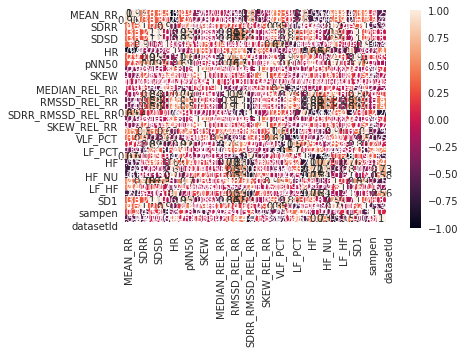

In [19]:
sns.heatmap(resultDF.corr(),annot=True);

In [21]:
finalDF =resultDF.drop('uuid',axis=1)

In [22]:
# Convert categorical fields into binary
finalDF_n = pd.get_dummies(finalDF, drop_first = True)

In [23]:
finalDF_n.shape

(369289, 37)

In [24]:
X=finalDF_n.drop(columns=['HR'],axis=1)
y=finalDF_n['HR']

In [25]:
X.shape,y.shape

((369289, 36), (369289,))

In [26]:
X.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,...,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition_no stress,condition_time pressure
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,11.133333,0.533333,-0.856554,0.335218,...,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,2,1,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,5.600000,0.000000,-0.408190,-0.155286,...,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,2,0,0
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,13.066667,0.200000,0.351789,-0.656813,...,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,2,0,0
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,11.800000,0.133333,-0.504947,-0.386138,...,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,2,1,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,20.200000,0.200000,-0.548408,-0.154252,...,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,2,1,0


In [27]:
y.head()

0    69.499952
1    64.363150
2    67.450066
3    68.809562
4    74.565728
Name: HR, dtype: float64

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((295431, 36), (73858, 36), (295431,), (73858,))

In [29]:
X_train_split,X_valid,y_train_split,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=7)
X_train_split.shape,X_valid.shape,y_train_split.shape,y_valid.shape

((236344, 36), (59087, 36), (236344,), (59087,))

FEATURE SELECTION using Backward Elimination, SequentialFeatureSelector,RFE,**LASSOCV** bold text bold text

In [30]:
type(y_train_split)

pandas.core.series.Series

In [33]:
from sklearn.svm import LinearSVR
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline

estimator=LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)

regr = make_pipeline(StandardScaler(),selector)

pipeselector = regr.fit(X_train_split, y_train_split)
print(pipeselector.named_steps['rfe'].ranking_)

[17 20 16 14  1 22 19 24  8  3 31 26 21 12 13 27  9  2  5  1  6  1 11  7
  1 10  4 23 18  1 15 28 25 32 30 29]


/home/rodrigo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 5.978339
Best score using built-in LassoCV: 0.970603
Lasso picked 8 variables and eliminated the other 28 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

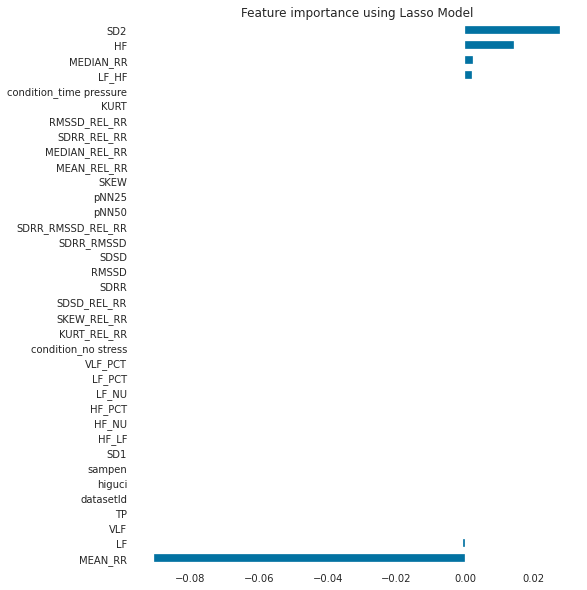

In [35]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train_split, y_train_split)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train_split,y_train_split))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [38]:
# !pip install xgboost

In [39]:
import warnings; warnings.simplefilter('ignore')

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

from sklearn.pipeline import make_pipeline
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)


def quick_eval(pipeline, X_train, y_train,X_test,y_test , verbose=True):
    """
    Quickly trains modeling pipeline and evaluates on test data. Returns original model, training RMSE, and testing
    RMSE as a tuple.
    """
    
   
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 
    #clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
   # scores =cross_val_score(pipeline, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
    scores =cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error')
    #print(f"Regression algorithm: {pipeline.named_steps['regressor'].__class__.__name__}")
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    return  pipeline.named_steps['regressor'].__class__.__name__,scores.mean(), scores.std() * 2
    
   
regressors = [
    LinearRegression(),
    Lasso(alpha=.5),
    Ridge(alpha=.1),
    LassoLars(alpha=.1),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor()
]



# Creating an empty Dataframe with column names only
resultsDfwithallColumns = pd.DataFrame(columns=['Method', 'MSE All columns', 'STD Dev'])

for r in regressors:
    pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', r)
    ])

    eval_scores=quick_eval(pipe, X_train_split, y_train_split,X_valid,y_valid)
    resultsDfwithallColumns = resultsDfwithallColumns.append({'Method': eval_scores[0], 
                          'MSE All columns': eval_scores[1], 
                          'STD Dev': eval_scores[2]
                         },ignore_index=True)
    #print()

    
# Store performance scores of the model in a dataframe for comparison
resultsDfwithallColumns


,Method,MSE All columns,STD Dev
0,LinearRegression,-0.956972,0.003984
1,Lasso,-1.397233,0.007588
2,Ridge,-0.955160,0.004667
3,LassoLars,-8.152872,0.068324
4,DecisionTreeRegressor,-0.020578,0.000276
5,RandomForestRegressor,-0.016158,0.000111
6,AdaBoostRegressor,-1.465480,0.038377
7,GradientBoostingRegressor,-0.358624,0.006960
8,XGBRegressor,-0.109012,0.001902


In [40]:
X_train_split.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,...,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition_no stress,condition_time pressure
4265,1003.295321,988.555125,154.983932,15.910268,15.908728,9.741126,10.333333,1.066667,-0.934246,0.064012,...,4615.761201,129.741121,0.007708,11.252924,218.891320,2.211436,1.092152,2,0,1
120839,583.306627,548.345925,123.211769,18.878554,18.878168,6.526547,13.533333,2.333333,-0.486589,0.645037,...,3684.647643,3.469913,0.288192,13.353335,173.735340,2.042937,1.274086,2,1,0
314275,842.195258,835.300310,70.872716,13.472784,13.472728,5.260436,5.600000,0.266667,2.682460,0.359223,...,2201.108066,13.549236,0.073805,9.529837,99.775076,1.982298,1.298224,2,0,1
18116,829.678816,830.965570,62.059453,15.024654,15.024590,4.130508,8.733333,0.133333,-0.266425,-0.072758,...,2061.497076,82.798714,0.012077,10.627535,87.119497,2.206430,1.148081,2,0,0
117508,823.780613,826.226855,76.166544,10.111924,10.111823,7.532350,2.933333,0.000000,1.888024,0.122539,...,2257.835974,21.361274,0.046814,7.152525,107.478027,1.938560,1.161808,2,1,0


In [41]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [42]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor())
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')

In [43]:
scores

array([-0.10790456, -0.10402988, -0.10756417])

In [44]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores

array([-0.95967307, -0.95544263, -0.96094106])

In [45]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=.5))
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores

array([-1.40124444, -1.39696462, -1.39145568])

In [46]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=.1))
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores


array([-0.95832858, -0.9535671 , -0.95954352])

In [47]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', LassoLars(alpha=.1))
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores

array([-8.14340698, -8.1433535 , -8.16390637])

In [48]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores


array([-0.01751784, -0.01698054, -0.01691315])

In [49]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores


array([-0.01302607, -0.01326315, -0.01326333])

In [50]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', AdaBoostRegressor())
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores

array([-1.46247305, -1.40964135, -1.45542329])

In [51]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', AdaBoostRegressor())
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores

array([-1.49436922, -1.48549811, -1.45849196])

In [52]:
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    #PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ])
scores =cross_val_score(pipe, X_train, y_train, scoring='neg_mean_absolute_error')
scores


array([-0.36284992, -0.35795512, -0.3611889 ])